### End of the Day Standardization with SVM

In [59]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics

In [3]:
df = pd.read_excel(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/credit_card.xlsx')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
column_names = df.loc[0,:]
column_names = column_names.to_list()
l1 = df.columns
l1 = l1.to_list()
df.columns = column_names
df.rename(columns= {'PAY_0':'PAY_1'}, inplace=True)
df.drop([0], inplace=True)
column_names = df.columns
for column in column_names:
    df[column] = pd.to_numeric(df[column]) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [17]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3, regex=True)

In [5]:
df.drop(columns='ID', inplace=True)

In [18]:
df.shape

(30000, 24)

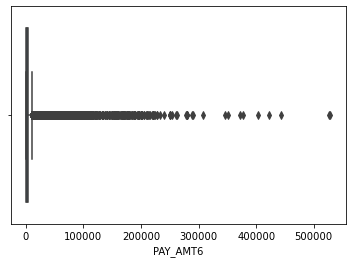

In [153]:

sns.boxplot(df['PAY_AMT6'])

In [140]:
print(df[df['LIMIT_BAL'] > 430000])

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
7         500000    1          1         2   29      0      0      0      0   
13        630000    2          2         2   41      0      0      0      0   
24        450000    2          1         1   40      0      0      0      0   
34        500000    2          2         1   54      0      0      0      0   
35        500000    1          1         1   58      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29887     630000    1          2         1   46      0      0      0      0   
29913     450000    1          1         2   31      0      0      0      0   
29944     500000    1          2         2   38      0      0      0      0   
29958     500000    1          2         2   31      0      0      0      0   
29964     610000    1          1         2   31      0      0      2      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64
430000.0
20000.0


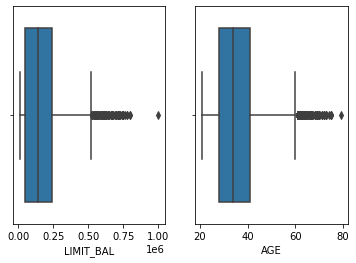

In [141]:
import seaborn as sns
plt.subplot(1,2,1)
sns.boxplot(X['LIMIT_BAL'])
plt.subplot(1,2,2)
sns.boxplot(X['AGE'])
print(df['LIMIT_BAL'].describe())
print(df['LIMIT_BAL'].quantile(.95))
print(df['LIMIT_BAL'].quantile(.05))

In [61]:
X = df.iloc[:,[0,4]]
X
y = df.iloc[:,-1]
#print(y.head(2))

In [65]:
X.head(2)

,LIMIT_BAL,AGE
1,20000,24
2,120000,26


In [127]:
y.head()

1    1
2    1
3    0
4    0
5    0
Name: default payment next month, dtype: int64

### Normalizing

In [128]:
# Normalize
from sklearn.preprocessing import Normalizer
nm = Normalizer()
X_N = nm.fit_transform(X)
X_N = pd.DataFrame(X_N)

In [132]:
X_N.head()

,0,1
0,0.999999,0.001200
1,1.000000,0.000217
2,1.000000,0.000378
3,1.000000,0.000740
4,0.999999,0.001140


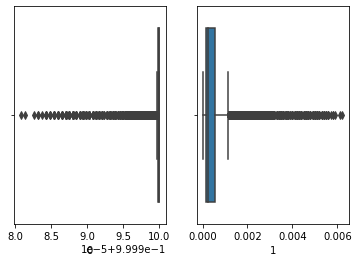

In [133]:
import seaborn as sns
plt.subplot(1,2,1)
sns.boxplot(X_N[0])
plt.subplot(1,2,2)
sns.boxplot(X_N[1])


In [386]:
X = df.iloc[:,:-1]
print(X.head(2))
y = df.iloc[:,-1]
print(y.head(2))
from sklearn.preprocessing import Normalizer
nm = Normalizer()
X_N = nm.fit_transform(X)
X_N = pd.DataFrame(X_N)

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
1      20000    2          2         1   24      2      2      0      0   
2     120000    2          2         2   26      0      2      0      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
1      0  ...        689          0          0          0         0       689   
2      0  ...       2682       3272       3455       3261         0      1000   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
1         0         0         0         0  
2      1000      1000         0      2000  

[2 rows x 23 columns]
1    1
2    1
Name: default payment next month, dtype: int64


### Standardized

In [420]:
# Standardized
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_S = sc.fit_transform(X)
X_S = pd.DataFrame(X_S) 

In [421]:
X_S.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.136720,0.810161,0.185828,-1.068797,-1.246020,2.160496,2.095469,-0.384614,-0.33999,-0.308621,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.849131,-1.029047,-0.469071,2.095469,-0.384614,-0.33999,-0.308621,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.849131,-0.161156,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.068797,0.164303,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.068797,2.334029,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


0.7322092559811012


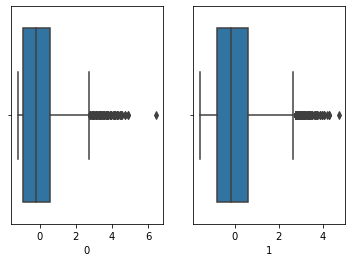

In [183]:
import seaborn as sns
plt.subplot(1,2,1)
sns.boxplot(X_S[0])
plt.subplot(1,2,2)
sns.boxplot(X_S[1])
from scipy.stats import skew
print(skew(df['AGE']))

In [103]:
y_S = sc.fit_transform(y.values.reshape(-1,1))
y_S = pd.DataFrame(y_S)

In [104]:
y_S.head()

,0
0,1.876378
1,1.876378
2,-0.532942
3,-0.532942
4,-0.532942


In [294]:
l1 = ['AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

print(X.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X.loc[:,['LIMIT_BAL']] = sc.fit_transform(X['LIMIT_BAL'].values.reshape(-1,1)) 
for i in l1:
    X[i] = sc.fit_transform(X[i].values.reshape(-1,1))

(30000, 23)


<ipython-input-294-b0a9b1304a45>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = sc.fit_transform(X[i].values.reshape(-1,1))
<ipython-input-294-b0a9b1304a45>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = sc.fit_transform(X[i].values.reshape(-1,1))
<ipython-input-294-b0a9b1304a45>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [296]:
print(X['MARRIAGE'].value_counts())
X

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,-1.136720,2,2,1,-1.246020,2,2,0,0,0,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
2,-0.365981,2,2,2,-1.029047,0,2,0,0,0,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
3,-0.597202,2,2,2,-0.161156,0,0,0,0,0,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
4,-0.905498,2,2,1,0.164303,0,0,0,0,0,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
5,-0.905498,1,2,1,2.334029,0,0,0,0,0,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404759,1,3,1,0.381275,0,0,0,0,0,...,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29997,-0.134759,1,3,2,0.815221,0,0,0,0,0,...,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29998,-1.059646,1,2,2,0.164303,4,3,2,0,0,...,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29999,-0.674276,1,3,1,0.598248,1,0,0,0,0,...,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


### Log method

In [211]:
X_log = np.log(X)
X_log

,LIMIT_BAL,AGE
1,9.903488,3.178054
2,11.695247,3.258097
3,11.407565,3.526361
4,10.819778,3.610918
5,10.819778,4.043051
...,...,...
29996,12.301383,3.663562
29997,11.918391,3.761200
29998,10.308953,3.610918
29999,11.289782,3.713572


0.24322100005150996
0.24322100005150996


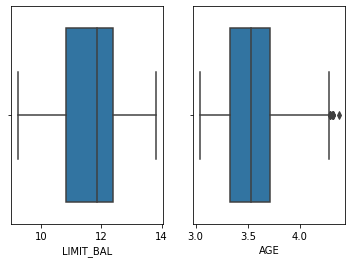

In [187]:
plt.subplot(1,2,1)
sns.boxplot(X_log['LIMIT_BAL'])
plt.subplot(1,2,2)
sns.boxplot(X_log['AGE'])
print(skew(X_log['AGE']))
print(skew(X_log['AGE']))

In [297]:
y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default payment next month, Length: 30000, dtype: int64

### Log Method for all columns with KNN algorithm

In [370]:
X = df.iloc[:,:-1]
print(X.head(2))
y = df.iloc[:,-1]
print(y.head(2))

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
1      20000    2          2         1   24      2      2      0      0   
2     120000    2          2         2   26      0      2      0      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
1      0  ...        689          0          0          0         0       689   
2      0  ...       2682       3272       3455       3261         0      1000   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
1         0         0         0         0  
2      1000      1000         0      2000  

[2 rows x 23 columns]
1    1
2    1
Name: default payment next month, dtype: int64


In [371]:
for i in l1:
    X[i] = np.log(X[i]+1)
X

<ipython-input-371-33b783bf9ba6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = np.log(X[i]+1)
C:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,9.903538,2,2,1,3.218876,2,2,0,0,0,...,6.536692,0.000000,0.000000,0.000000,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000
2,11.695255,2,2,2,3.295837,0,2,0,0,0,...,7.894691,8.093462,8.147867,8.090096,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402
3,11.407576,2,2,2,3.555348,0,0,0,0,0,...,9.514880,9.570250,9.612400,9.651816,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393
4,10.819798,2,2,1,3.637586,0,0,0,0,0,...,10.805517,10.251147,10.273671,10.293771,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755
5,10.819798,1,2,1,4.060443,0,0,0,0,0,...,10.486708,9.949464,9.859901,9.859118,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,12.301387,1,3,1,3.688879,0,0,0,0,0,...,12.247051,11.385149,10.349391,9.679156,9.047939,9.903538,8.517993,8.022241,8.517393,6.908755
29997,11.918397,1,3,2,3.784190,0,0,0,0,0,...,8.161375,9.102755,8.554682,0.000000,7.516433,8.168203,9.104869,4.867534,0.000000,0.000000
29998,10.308986,1,2,2,3.637586,4,3,2,0,0,...,7.922624,9.946499,9.932221,9.870861,0.000000,0.000000,9.998843,8.343078,7.601402,8.039480
29999,11.289794,1,3,1,3.737670,1,0,0,0,0,...,11.242494,10.873793,9.380589,10.798452,11.360951,8.134468,7.072422,7.563720,10.877387,7.498316


In [379]:
X[l1].astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  float64
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  29426 non-null  float64
 12  BILL_AMT2  29349 non-null  float64
 13  BILL_AMT3  29369 non-null  float64
 14  BILL_AMT4  29350 non-null  float64
 15  BILL_AMT5  29369 non-null  float64
 16  BILL_AMT6  29337 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

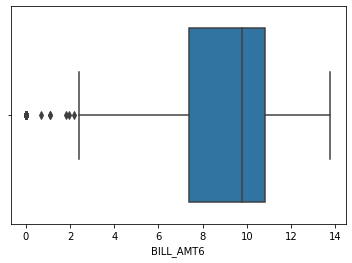

In [359]:
sns.boxplot(X['BILL_AMT6'])

### Boxcox Method

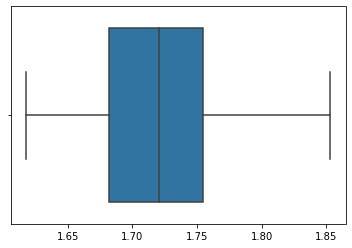

In [282]:
from scipy import stats
limit = stats.boxcox(X['AGE'])
limit = pd.Series(limit[0])
sns.boxplot(limit)

In [362]:
for i in l1:
    limit = stats.boxcox(X[i]+1)
    X[i] = pd.Series(limit[0])
X

<ipython-input-362-8ec8ad88884f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = pd.Series(limit[0])


ValueError: Data must be positive.

In [361]:
l1 = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
print(X.columns)
#X.loc[:,l1]
X_log_full = np.log(X['BILL_AMT1'])

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


C:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Algorithm

In [228]:
y.replace(['Non-defaulters','Defaulters'],[0,1], inplace=True)

In [429]:
y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default payment next month, Length: 30000, dtype: int64

In [381]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  float64
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  29426 non-null  float64
 12  BILL_AMT2  29349 non-null  float64
 13  BILL_AMT3  29369 non-null  float64
 14  BILL_AMT4  29350 non-null  float64
 15  BILL_AMT5  29369 non-null  float64
 16  BILL_AMT6  29337 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [422]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_S,y, test_size=0.2, random_state = 0)

In [423]:
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [424]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 23)
(24000,)
(6000, 23)
(6000,)


In [425]:
#model = LogisticRegression()
#model = neighbors.KNeighborsClassifier()
#model = DecisionTreeClassifier(criterion='entropy',max_depth= 8)
model = SVC(kernel='linear',  gamma = 10, C= 1)


model.fit(X_train,y_train)

SVC(C=1, gamma=10, kernel='linear')

In [430]:
#Testing
test_predicted = model.predict(X_test)
print(test_predicted)
print(len(test_predicted),"-----------------")
train_predicted = model.predict(X_train)
print(train_predicted)
print(len(train_predicted))

[1 0 0 ... 0 1 0]
6000 -----------------
[0 0 1 ... 0 0 0]
24000


In [431]:
y_test.value_counts()

0    4703
1    1297
Name: default payment next month, dtype: int64

In [432]:
y_train.value_counts()

0    18661
1     5339
Name: default payment next month, dtype: int64

In [433]:
#Confusion Matrix
print(metrics.confusion_matrix(y_test, test_predicted),"\n------------------")
print(metrics.confusion_matrix(y_train, train_predicted))

[[4459  244]
 [ 789  508]] 
------------------
[[17573  1088]
 [ 3270  2069]]


In [434]:
#Classification Report
print(metrics.classification_report(y_test, test_predicted))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4703
           1       0.68      0.39      0.50      1297

    accuracy                           0.83      6000
   macro avg       0.76      0.67      0.70      6000
weighted avg       0.81      0.83      0.81      6000



In [435]:
acurracy = metrics.accuracy_score(y_test, test_predicted)
acurracy

0.8278333333333333

In [436]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X_train,\
     y = y_train, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))
print(accuracies)

Accuracy Mean 0.8165833333333333 Accuracy Variance      0.0045215533220835215
[0.81291667 0.81875    0.82291667 0.81916667 0.82       0.81541667
 0.81708333 0.81458333 0.80583333 0.81916667]


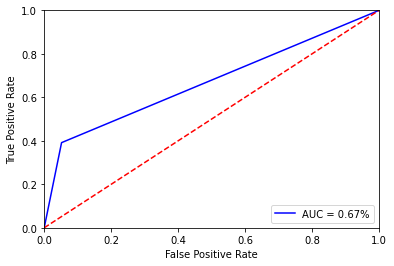

In [438]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, test_predicted)
roc_auc = metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f%%' %roc_auc )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [324]:
preds

array([0.5599022 , 0.42985075, 0.        , ..., 0.05654223, 0.80447761,
       0.07619048])

In [439]:
metrics.roc_curve(y_test, test_predicted)

(array([0.        , 0.05188178, 1.        ]),
 array([0.        , 0.39167309, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [440]:
fpr

array([0.        , 0.05188178, 1.        ])

In [441]:
tpr

array([0.        , 0.39167309, 1.        ])